In [10]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.io import wavfile as io


class signal_mono: 
    pass
        
## on conviendra que les champs d'un signal_mono sont : 
##  signal.x  : les valeurs du signal 
##  signal.N= : le nombre d'échantillons 
##  signal.Fs : la frequence d'echantillonnage en Hz
##  signal.t : le vecteur des temps associé
## EXEMPLE D'APPLICATION :  plt.plot(signal.t,signal.x)





def normaliser_son_mono(x):
    M = np.max(abs(x)); ## la plus grande valeur absolue du signal
    return  x/M;   ### conversion automatique au format réel et normalisation 


def creer_signal(valeurs,Fs):
    out = signal_mono()
    out.x = normaliser_son_mono(valeurs)
    out.N= np.size(out.x)
    out.Fs=Fs
    out.t=np.arange(out.N)/Fs
    return out

def extraire(signal,t_min,t_max):
    condition = ( signal.t   < t_max )*( signal.t > t_min)
    out= signal_mono
    out.x = np.extract(condition,signal.x)
    out.t=np.extract(condition,signal.t)
    out.N= signal.N
    out.Fs=signal.Fs
    return out

def enregistrer_son(nom_fichier,signal,Fs):
    y=0.5*normaliser_son_mono(signal.x)  ### le facteur 0.5 pour éviter d'exploser les oreilles...
    scaled = np.round(32767*y)   ### passage en 16 bits
    newdata = scaled.astype(np.int16)   ### conversion en type int
    io.write(nom_fichier, Fs, newdata)   ### codage en wav

# Partie 1

Soit $f_0$ une fréquence donnée et G et P deux vecteurs de même taille - disons $N$. Les composantes de $G$ sont positives (ce sont les gains) et celles de $P$ sont des angles exprimés en radians (ce sont les phases) : voir l'exercice no1 de la seconde feuille de TD sur les séries de Fourier. On associe alors le signal 
$$
x(t)=\sum_{n=0}^{N-1}G_n \cos(2\pi n f_0 t+ P_n).
$$

**1)** Codez  une fonction Python que vous nommerez **creer_signal_periodique** qui à $P,G,f_0$ et aussi une durée $T$ et une fréquence d'échantillonnage $F_s$ retourne un signal de la classe **signal_mono**  

In [11]:
def creer_signal_periodique(Phase, Gain, f0, t, Fs):
    signalData = np.zeros(t.size)
    
    for tIndex in range(0, t.size):
        time = tIndex/Fs

        for n in range (0, Gain.size):
            signalData[tIndex] += Gain[n] * np.cos(2*np.pi*(2*n + 1)*f0*time + Phase[n])
        
        # Pour former signal rect
        signalData[tIndex] *= (2/np.pi)
        signalData[tIndex] += 1/2
    
    
    signal = creer_signal(signalData, Fs)
    
    return signal

**2)** Reprenez l'exemple du rectangle périodique, pair, vu en cours. Exprimez les coefficients $G_k$ et $P_k$.

In [14]:
def phase(N):
    #Phase = np.random.uniform(-np.pi, np.pi, N)
    Phase = np.zeros(N)
    return Phase

def gain(N):
    Gain = np.arange(N, dtype = np.float) # Must specify the type otherwise treated as decimal numbers
    for n in range(Gain.size):
        Gain[n] = ((-1)**n) / (2*n +1)
            
    return Gain

**3)** Appliquez **creer_signal_periodique** avec les coefficients définis à la question précédente pour le choix des paramètres suivant : $N=20$, $f_0=440$Hz, $T=4$s et $F_s=22050$Hz. Visualisez le signal sur l'intervalle $[1, 1.01]$ (en seoondes) : vous pourrez utiliser la fonction **extraire**. Ensuite, écoutez le signal.

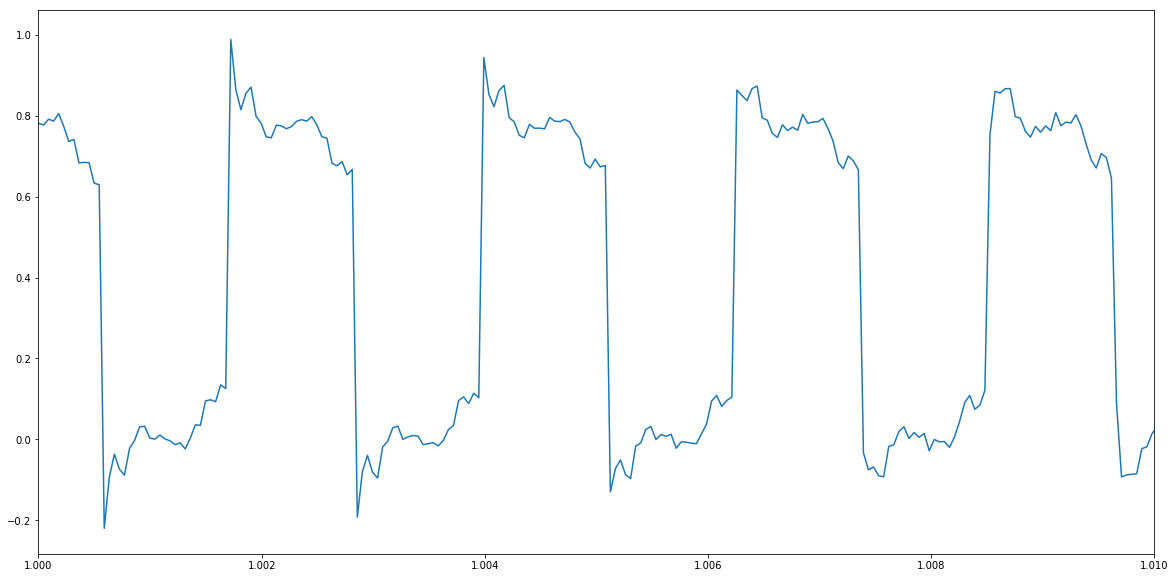

In [18]:
N = 20
f0 = 440
Fs = 22050
Ts = 1/Fs
t = np.arange(0, 4, Ts)
Gain = gain(N)
Phase = phase(N)

signalRectEven = creer_signal_periodique(Phase, Gain, f0, t, Fs)

plt.figure(1, figsize = (20, 10))
plt.plot(signalRectEven.t, signalRectEven.x)
plt.xlim(1, 1.01)

enregistrer_son("signal_periodique_P1_1.wav", signalRectEven, Fs)

**4)** Reprenez la question suivante mais, cette fois, au lieu des phases théoriques du rectangle choisissez des phases aléatoires (calculez un échantillon uniforme sur $[0,2\pi]$. Le graphe du signal obtenu  est-il très différent d'un rectangle périodique? Percevez-vous une différence entre le son obtenu et le son du rectangle? 

In [15]:
def phase(N):
    Phase = np.random.uniform(0, 2/np.pi, N)

    return Phase

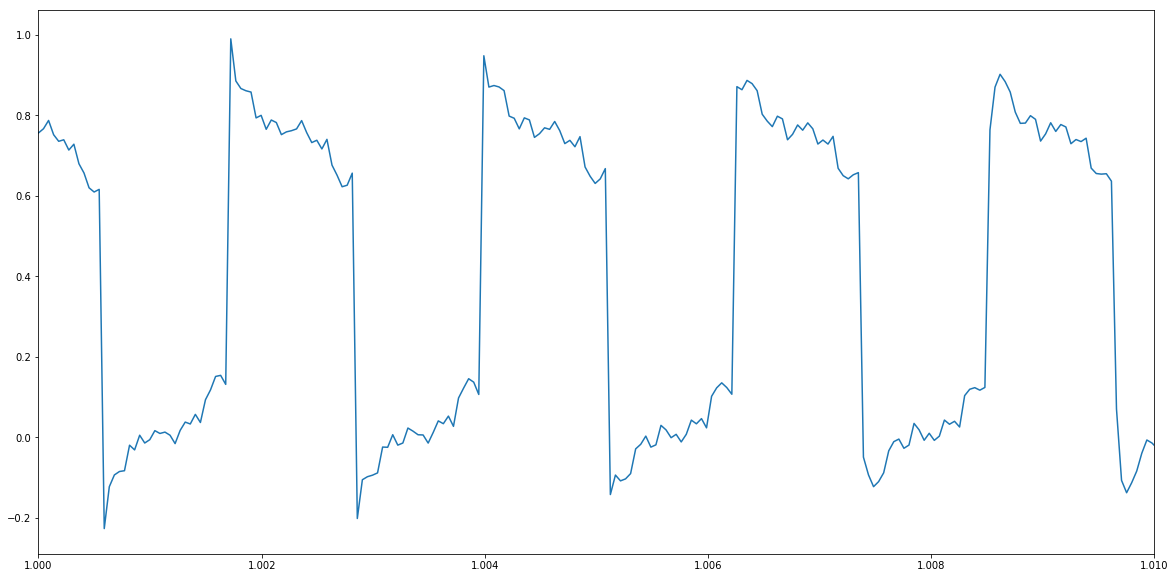

In [17]:
N = 20
f0 = 440
Fs = 22050
Ts = 1/Fs
t = np.arange(0, 4, Ts)
Gain = gain(N)
Phase = phase(N)

signalRectEven = creer_signal_periodique(Phase, Gain, f0, t, Fs)

plt.figure(1, figsize = (20, 10))
plt.plot(signalRectEven.t, signalRectEven.x)
plt.xlim(1, 1.01)

enregistrer_son("signal_periodique_P1_2.wav", signalRectEven, Fs)

le graphe obtenu est globalement différent 
Il y a cependant des similitudes, visuellement on constate un "décalage progressif" des valeurs qui réitère à chaque créneau

Notre oreille n'est pas capable de distinguer la différence. Le son garde le même timbre 

**5)** Choisissez un jeu de gains qui engendre, selon vous, un son intéressant (on dirait : un timbre qui vous plait. D'ailleurs, pourquoi vous plait-il?). Modifiez les phases de manière aléatoire et écoutez le "nouveau son". Cette expérience illustre-t-elle le principe selon lequel l'oreille n'est pas sensible aux phases? 

In [8]:
def phase(N):
    Phase = np.random.uniform(-10, np.pi, N)

    return Phase

def gain(N):
    Gain = np.arange(N, dtype = np.float) # Must specify the type otherwise treated as decimal numbers
    for n in range(Gain.size):
        Gain[n] = -1**n / (3*n +2)
            
    return Gain

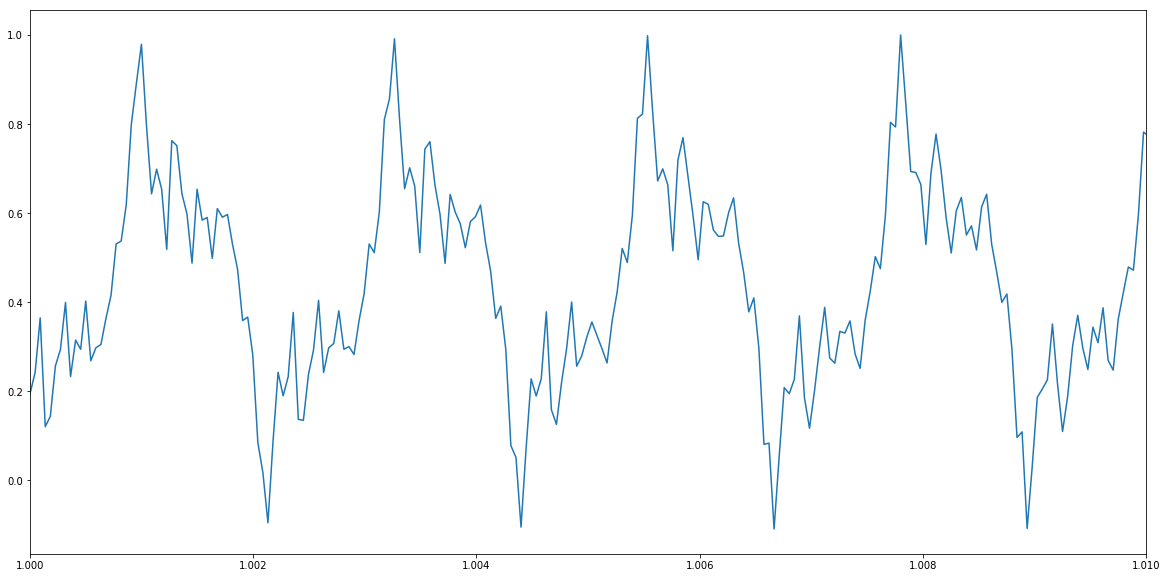

In [9]:
N = 20
f0 = 440
Fs = 22050
Ts = 1/Fs
t = np.arange(0, 4, Ts)
Gain = gain(N)
Phase = phase(N)

signalRectEven = creer_signal_periodique(Phase, Gain, f0, t, Fs)

plt.figure(1, figsize = (20, 10))
plt.plot(signalRectEven.t, signalRectEven.x)
plt.xlim(1, 1.01)

enregistrer_son("signal_periodique_P1_3", signalRectEven, Fs)

Les changements de gains sont plutôt facilement perceptibles
cependant les manipulations sur la phase ne le sont pas du tout, on peut tirer de cette experience que l'impacte du déphasage n'est pas un paramètre perceptible pour l'oreille humaine.

# Partie 2

Soit le signal de période $2\pi$ défini pour tout entier $k\geq 0$ et tout $t\in[0,2\pi]$ par :  
$$
x_k(t)=t^k.
$$
Notons $c_k[n]$ les coefficients de Fourier de $x_k$. Faites attention à la position des indices! 

**1)**Rappelez l'expression de $c_k[n]$.

$$c_k[n]=\frac{1}{T_{0}}\cdot\int_{(T_{0})}x(n)\cdot\exp(-i2\pi kf_{0}t)\,dt$$
$$c_k[n]=\frac{1}{2\pi}\int_{0}^{2\pi}t^{k}\cdot\exp(-ikt)\,dt$$

**2)** Calculez pour tout entier naturel $k$ le coefficient $c_k[0]$.

$$c_{k}[0]=\frac{1}{2\pi}\int_{0}^{2\pi}0^{k}\,dt$$

**3)** Calculez $c_0[n]$ pour tout $n\neq 0$

$$c_{0}[n]=\frac{1}{2\pi}(x+c)$$

**4)** En effectuant une IPP bien choisie montrez que pour tout $k\geq 1$ et tout $n\neq 0$ on a 
$$
c_k[n]=\frac{i}{n} \left(\alpha_k -\beta_k c_{k-1}[n]   \right)  
$$
où vous déterminerez les constantes $\alpha_k$ et $\beta_k$. 